Wine Quality


In [9]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [10]:
# URL of the CSV data
csv_url = 'https://archive.ics.uci.edu/static/public/186/data.csv'

# Fetch data from the URL
response = requests.get(csv_url)
data = StringIO(response.text)

# Read the CSV data
df = pd.read_csv(data)

# Convert 'color' column to binary (0 for 'red', 1 for 'white')
df['color'] = df['color'].map({'red': 0, 'white': 1})

# Binarize the quality variable
# Wines with quality 6 or above are labeled as 'high quality' (1), others are 'low quality' (0)
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Value counts
print(df['quality_binary'].value_counts())

1    4113
0    2384
Name: quality_binary, dtype: int64


The distribution of quality variable is as follows
* 6  -  2836
* 5   - 2138
* 7   - 1079
* 4    - 216
* 8    - 193
* 3    -  30
* 9    -   5

We have chosen median value 6 for binary classification of the target fueature (wine quality) - based on this value, less than 6 were considered as low quality, 6 or more were considered as high quality

## Probabilistic Classifiier

In [11]:
# Define features and target variable
X = df.drop(['quality', 'quality_binary'], axis=1)  # Drop non-feature columns
y = df['quality_binary']

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

Feature Selection: All columns except 'quality' and 'quality_binary' are used as features.

Target Variable: 'quality_binary' is used as the target variable.

Standardization: Features are standardized, crucial for logistic regression as it assumes linear relationships.

Data Splitting: Data is split into training (70%) and testing (30%) sets. Random state is set for reproducibility.

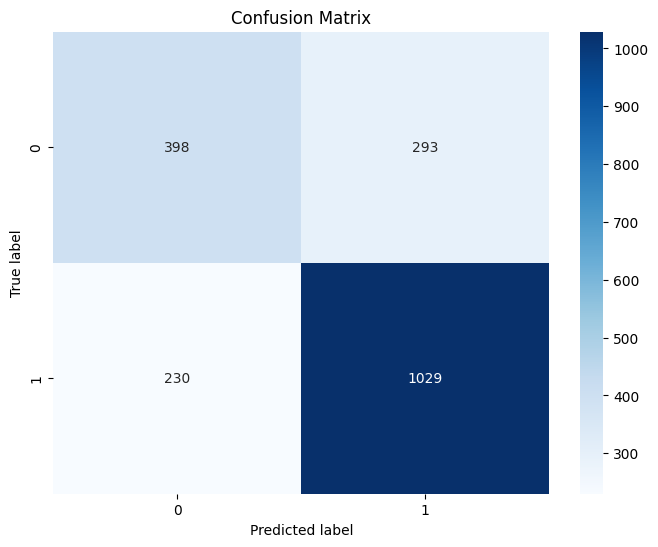

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       691
           1       0.78      0.82      0.80      1259

    accuracy                           0.73      1950
   macro avg       0.71      0.70      0.70      1950
weighted avg       0.73      0.73      0.73      1950



In [12]:
# Predictions
y_pred = log_reg.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report (for additional metrics)
print(classification_report(y_test, y_pred))

## Euclidean Distance Classifier

In [13]:
# Initialize the kNN classifier
# The choice of 'k' can be tuned; here we start with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

Feature Selection & Target Variable: Same as Logistic Regression.

Data Splitting: Same method of splitting, ensuring consistency across classifiers.

No Standardization: Unlike logistic regression, standardization is not a prerequisite for kNN.

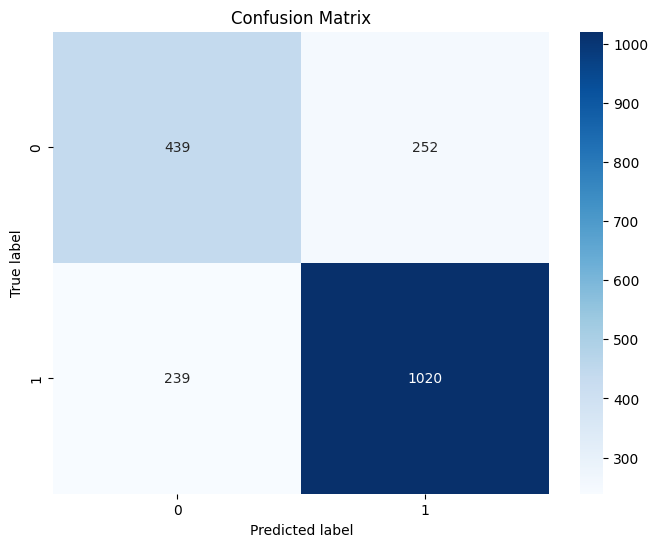

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       691
           1       0.80      0.81      0.81      1259

    accuracy                           0.75      1950
   macro avg       0.72      0.72      0.72      1950
weighted avg       0.75      0.75      0.75      1950



In [14]:
# Predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## Cosine Similarity Classifier

In [15]:
# Define features and target variable
X = df.drop(['quality', 'quality_binary'], axis=1)  # Drop non-feature columns
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class CosineKNNClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.neighbors = NearestNeighbors(n_neighbors=self.n_neighbors, metric='cosine')

    def fit(self, X, y):
        self.neighbors.fit(X)
        self.y = y

    def predict(self, X):
        distances, indices = self.neighbors.kneighbors(X)
        predictions = []
        for idx_group in indices:
            target_group = self.y.iloc[idx_group]
            pred = target_group.value_counts().idxmax()  # Majority voting
            predictions.append(pred)
        return np.array(predictions)

# Initialize and train the model
cosine_knn = CosineKNNClassifier(n_neighbors=5)
cosine_knn.fit(X_train, y_train)

Feature Selection & Target Variable: Same as the above classifiers.

Data Splitting: Consistent with other models.

Custom Classifier: A custom kNN classifier is created using the cosine
 similarity metric, different from the Euclidean metric used in standard kNN.

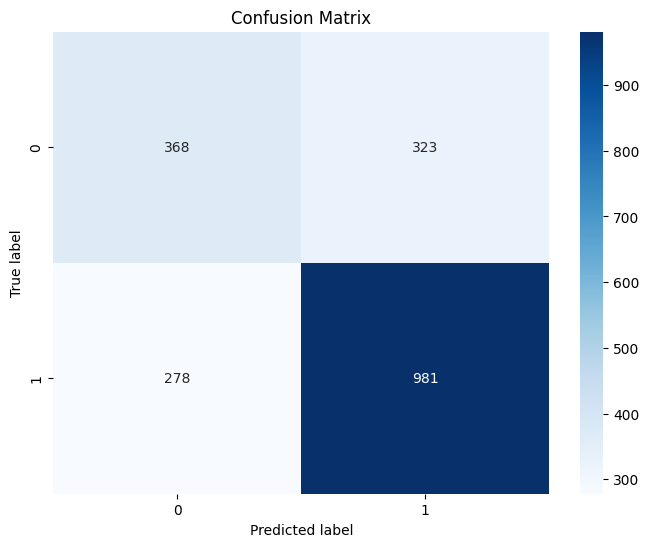

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       691
           1       0.75      0.78      0.77      1259

    accuracy                           0.69      1950
   macro avg       0.66      0.66      0.66      1950
weighted avg       0.69      0.69      0.69      1950



In [16]:
# Predictions
y_pred = cosine_knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## Wine Quality Prediction Results Analysis

### 1. Logistic (Probabilistic) Classifier
- **Precision:** Moderate for both classes, higher for class 1 (0.78) than class 0 (0.63).
- **Recall:** Slightly better for class 1 (0.82) compared to class 0 (0.58).
- **F1-Score:** Balanced between classes, slightly favoring class 1 (0.80 vs. 0.60).
- **Overall Accuracy:** 73%
- **Analysis:** The Logistic Classifier shows a decent performance, particularly for class 1 (higher quality wines). This might be due to the probabilistic nature of logistic regression, which can handle linear relationships between variables effectively. However, the slightly lower performance on class 0 suggests that the model might struggle with wines of lower quality, possibly due to less distinct or overlapping features.

### 2. Euclidean Distance Classifier
- **Precision:** Similar to logistic but slightly improved for both classes.
- **Recall:** Consistently high for class 1 (0.81) and comparable to logistic for class 0 (0.64).
- **F1-Score:** Shows a notable improvement for class 0 (0.64).
- **Overall Accuracy:** 75%
- **Analysis:** The Euclidean Distance Classifier outperforms the logistic model slightly. This indicates that the Euclidean metric, which measures the straight-line distance between points (feature sets of wines in this case), might be more effective in differentiating between the two classes, particularly for the lower quality class.

### 3. Cosine Similarity Classifier
- **Precision:** Lower for both classes, notably for class 0 (0.57).
- **Recall:** Slightly lower for class 1 (0.78) and class 0 (0.53).
- **F1-Score:** The lowest among the three classifiers for both classes.
- **Overall Accuracy:** 69%
- **Analysis:** The Cosine Similarity Classifier shows the weakest performance. This suggests that measuring the cosine of the angle between feature vectors is less effective for this particular problem. It might be that the wine quality prediction requires a metric sensitive to the magnitude of feature vectors, which cosine similarity does not provide.

### Conclusion
Overall, the Euclidean Distance Classifier seems to be the most effective for wine quality prediction in this scenario, closely followed by the Logistic Classifier. The lower performance of the Cosine Similarity Classifier indicates its unsuitability for this specific problem, likely due to its insensitivity to the magnitude of feature vectors.
